# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 564


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units="+units+ "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | huarmey
Processing Record 2 of Set 1 | minas de marcona
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | haiku-pauwela
Processing Record 5 of Set 1 | nagqu
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | kingston
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | butterworth
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | guerrero negro
Processing Record 14 of Set 1 | inari
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | tsiombe
Processing Record 18 of Set 1 | siwa oasis
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huarmey,-10.0681,-78.1522,24.41,84,92,5.05,PE,1707694670
1,minas de marcona,-15.2119,-75.1103,24.21,61,98,2.84,PE,1707694670
2,ushuaia,-54.8000,-68.3000,6.81,76,75,12.86,AR,1707694670
3,haiku-pauwela,20.9219,-156.3051,25.70,69,20,4.63,US,1707694670
4,nagqu,31.5000,92.0000,-13.36,63,100,1.58,CN,1707694670


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huarmey,-10.0681,-78.1522,24.41,84,92,5.05,PE,1707694670
1,minas de marcona,-15.2119,-75.1103,24.21,61,98,2.84,PE,1707694670
2,ushuaia,-54.8000,-68.3000,6.81,76,75,12.86,AR,1707694670
3,haiku-pauwela,20.9219,-156.3051,25.70,69,20,4.63,US,1707694670
4,nagqu,31.5000,92.0000,-13.36,63,100,1.58,CN,1707694670


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

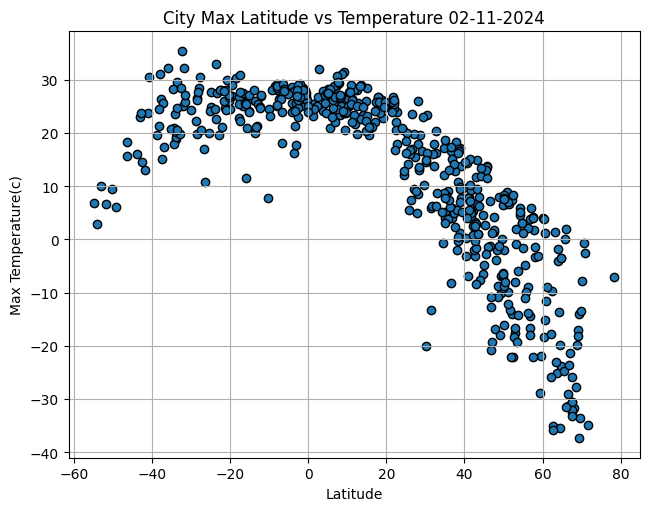

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='k')

# Incorporate the other graph properties
# YOUR CODE HERE

plt.grid(True) 
plt.tight_layout()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(c)')
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs Temperature {date}")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

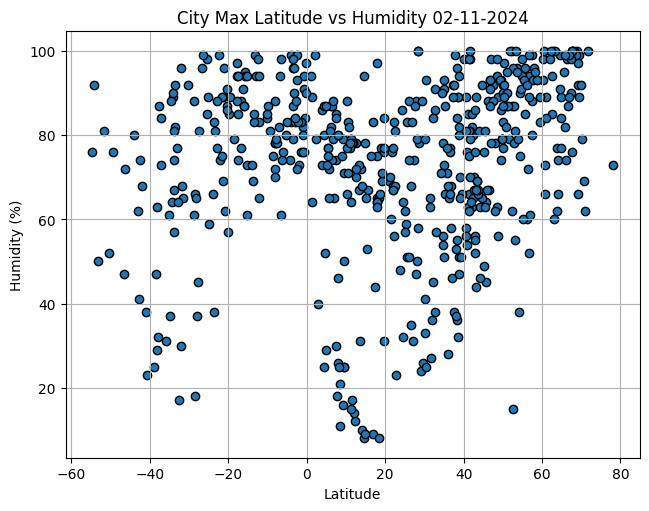

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='k')

# Incorporate the other graph properties
plt.grid(True) 
plt.tight_layout()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs Humidity {date}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

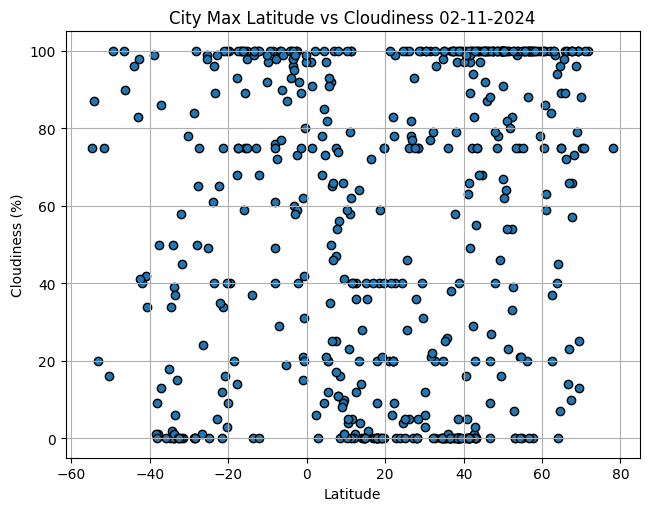

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='k')

# Incorporate the other graph properties
plt.grid(True) 
plt.tight_layout()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs Cloudiness {date}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

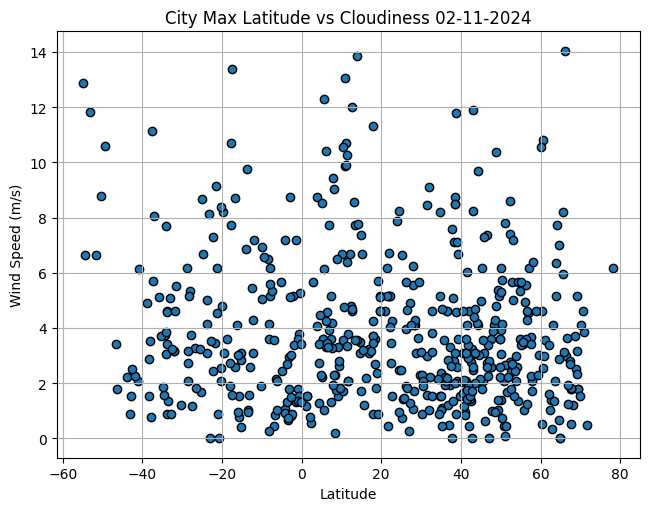

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='k')

# Incorporate the other graph properties
plt.grid(True) 
plt.tight_layout()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs Cloudiness {date}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,haiku-pauwela,20.9219,-156.3051,25.70,69,20,4.63,US,1707694670
4,nagqu,31.5000,92.0000,-13.36,63,100,1.58,CN,1707694670
6,klyuchi,52.2667,79.1667,-13.98,87,83,7.42,RU,1707694671
7,kingston,17.9970,-76.7936,26.53,65,20,11.32,JM,1707694621
9,butterworth,5.3991,100.3638,27.02,77,20,3.60,MY,1707694671


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huarmey,-10.0681,-78.1522,24.41,84,92,5.05,PE,1707694670
1,minas de marcona,-15.2119,-75.1103,24.21,61,98,2.84,PE,1707694670
2,ushuaia,-54.8000,-68.3000,6.81,76,75,12.86,AR,1707694670
5,port mathurin,-19.6833,63.4167,26.87,85,100,8.21,MU,1707694671
8,port alfred,-33.5906,26.8910,20.10,82,6,1.34,ZA,1707694671


###  Temperature vs. Latitude Linear Regression Plot

y = -0.76x +34.92
The r-value is: 0.7636724128327302


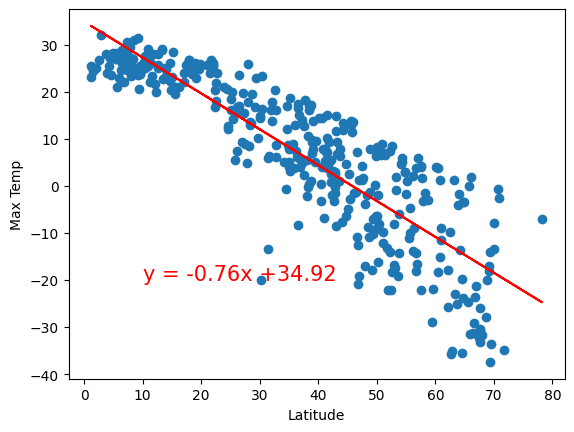

In [15]:
# Linear regression on Northern Hemisphere
x_values_nh=northern_hemi_df['Lat']
y_values_nh=northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values = x_values_nh * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.18x +27.72
The r-value is: 0.214394862663014


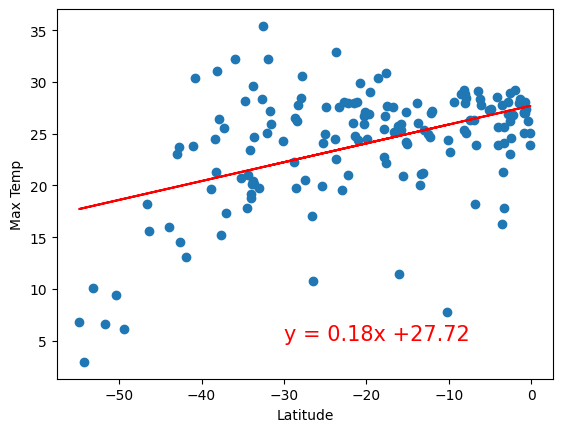

In [16]:
# Linear regression on Southern Hemisphere
x_values_nh=southern_hemi_df['Lat']
y_values_nh=southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values = x_values_nh * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northean Hemisphere: in Linear Regression plot, a downward trend can be noticed. As latitude increases the max temp drops.
Southern Hemisphere: in linear regression plot,a upward trend can be noticed. as latitude increaes the max temp increases. But in this trend the 'dots' are scattered in whole plot which means there is not a strong corelation between elements in the plot.

### Humidity vs. Latitude Linear Regression Plot

y = 0.46x +55.59
The r-value is: 0.16464601172893306


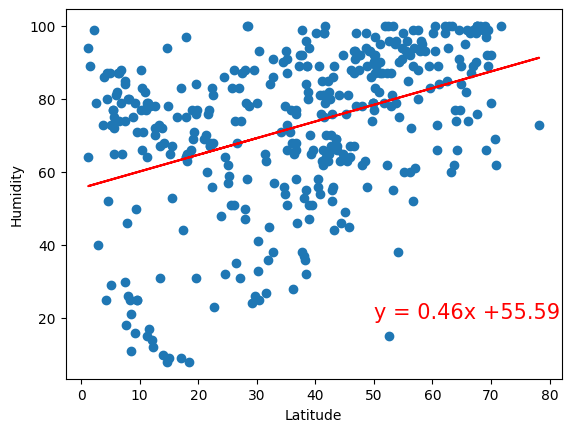

In [17]:
# Northern Hemisphere
x_values_nh=northern_hemi_df['Lat']
y_values_nh=northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values = x_values_nh * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.59x +88.39
The r-value is: 0.20609639767696145


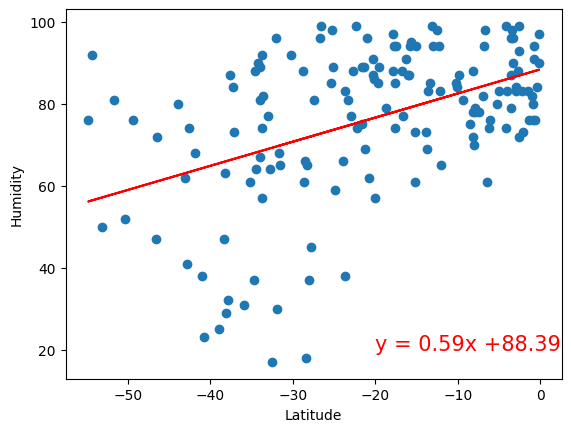

In [18]:
# Southern Hemisphere
x_values_nh=southern_hemi_df['Lat']
y_values_nh=southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values = x_values_nh * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In northern hemisphere,upward trend can be noticed. Humidity increases as cities get close to Equator.
In southern hemisphere,it is clear from the plot that there is a weak positive correlation between latitude and humidity although upward trend can be nocticed. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.69x +28.93
The r-value is: 0.10722097606318719


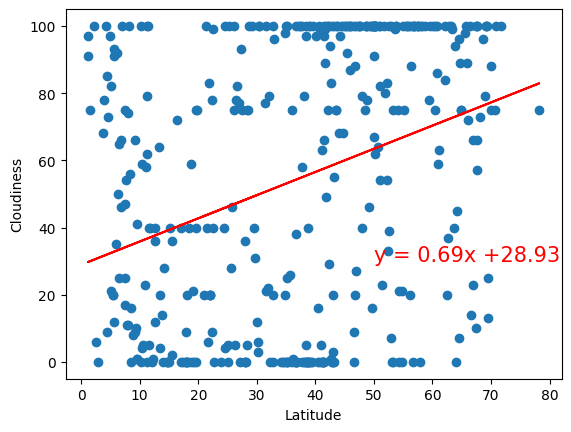

In [19]:
# Northern Hemisphere
x_values_nh=northern_hemi_df['Lat']
y_values_nh=northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values = x_values_nh * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.89x +76.98
The r-value is: 0.11549878181634109


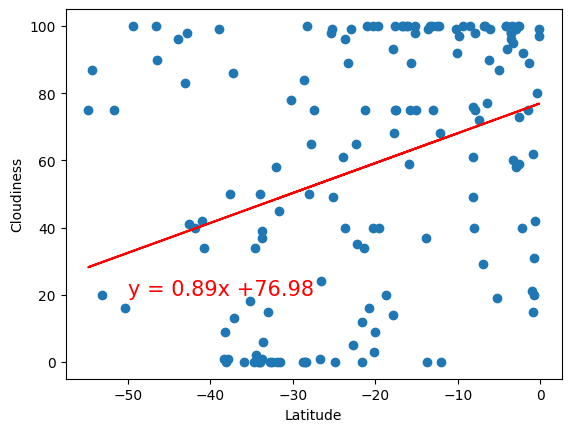

In [20]:
# Southern Hemisphere
x_values_nh=southern_hemi_df['Lat']
y_values_nh=southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values = x_values_nh * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In northern hemisphere, there is not a strong positive correlation between latitude and cloudiness.
In southern hemisphere, a modreate positive correlation can be nocticed on the plot between latitude ans cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.02x +4.51
The r-value is: 0.022242356652400062


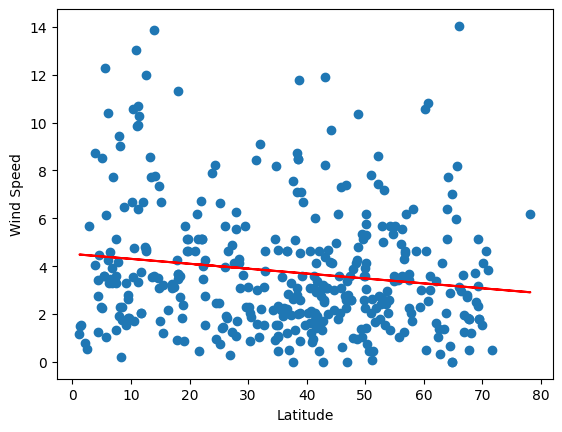

In [23]:
# Northern Hemisphere
x_values_nh=northern_hemi_df['Lat']
y_values_nh=northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values = x_values_nh * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(7,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.04x +3.01
The r-value is: 0.051649176038602834


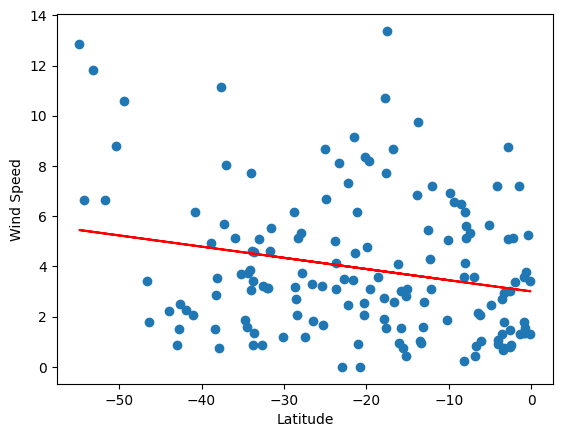

In [22]:
# Southern Hemisphere
x_values_nh=southern_hemi_df['Lat']
y_values_nh=southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values = x_values_nh * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In northern hemisphere, although there is mildly decreasing trend in the plot but it is clear that there is almost no corelatio between latitude and wind speed.
In southern hemisphere, there is a very weak corelation between latitude and wind speed.
